# Importing libraries

In [1]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import Datasets as DS
import Methods as Md
import DownstreamAnalysis as DA
from sklearn.metrics.pairwise import euclidean_distances

# Loading data

In [3]:
dir = 'D:/Research/NeuroDAVIS/Results/HD/Comparison/'
X,y = DS.LoadData('Usoskin')

In [4]:
X.shape

(621, 4184)

In [5]:
y = y.reshape((y.shape[0],))

In [6]:
np.unique(y)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12], dtype=int64)

In [7]:
c1=list(np.unique(y))
c2=['blue', 'green', 'orange', 'red', 'yellow',
    'pink', 'purple', 'aquamarine', 'gray', 'darkgreen',
    'skyblue', 'lime', 'royalblue'] #, 'cyan', 'olive', 'tomato', 'saddlebrown']
cols = map(lambda x: c2[c1.index(x)], y)
cs = [i for i in list(cols)]

# Applying T-SNE

In [8]:
X_tsne = Md.UseMethod('TSNE', X)

# Plotting the results

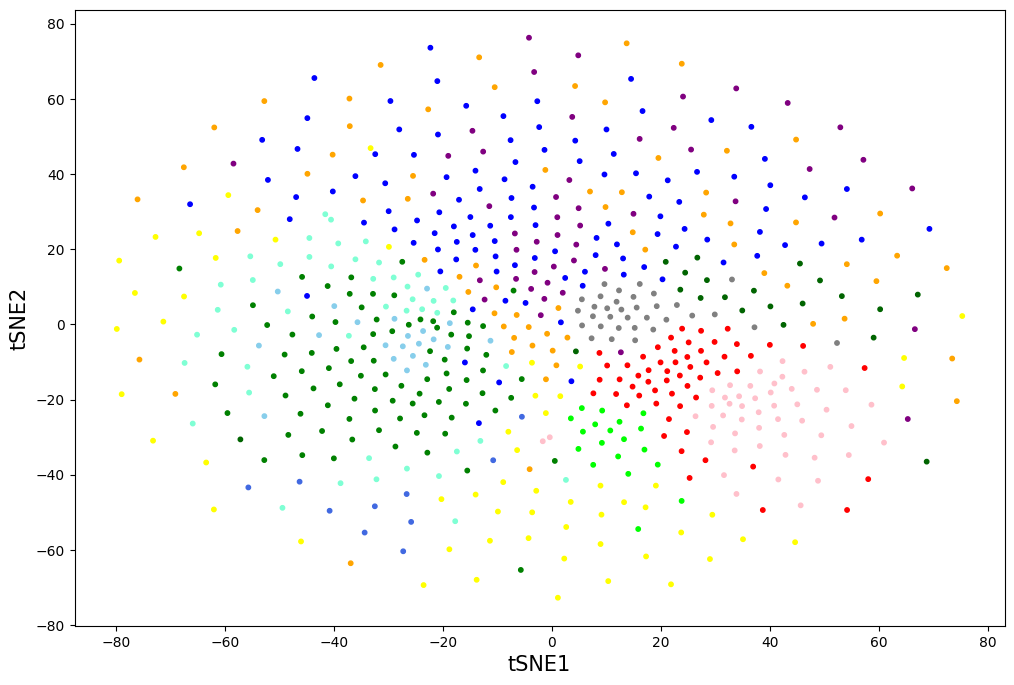

In [9]:
plt.figure(figsize=(12,8))
plt.scatter(X_tsne[:,0],X_tsne[:,1],c=cs,s=10)
plt.xlabel("tSNE1", fontsize = 15)
plt.ylabel("tSNE2", fontsize = 15)
plt.savefig(dir+'Usoskin_tSNE.eps', dpi = 1200, format = 'eps')

# Applying UMAP

In [10]:
X_umap = Md.UseMethod('UMAP', X)

# Plotting the results

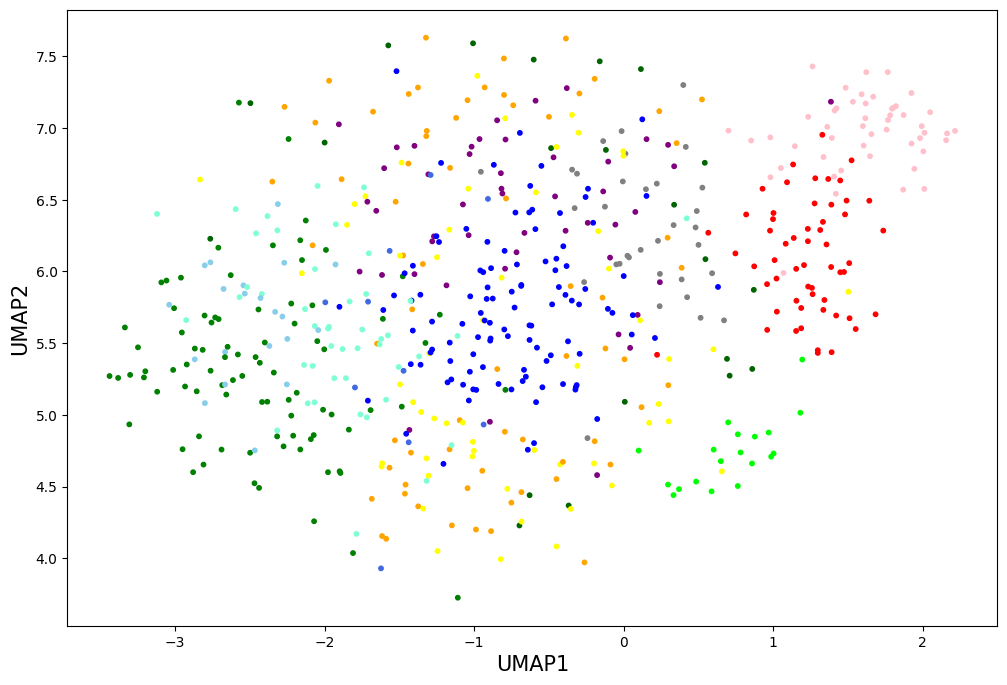

In [11]:
plt.figure(figsize=(12,8))
plt.scatter(X_umap[:,0],X_umap[:,1],c=cs,s=10)
plt.xlabel("UMAP1", fontsize = 15)
plt.ylabel("UMAP2", fontsize = 15)
plt.savefig(dir+'Usoskin_UMAP.eps', dpi = 1200, format = 'eps')

# Spearman correlation

In [13]:
iteration = 10
score_tsne = []
score_umap = []
dist_orig = np.square(euclidean_distances(X, X)).flatten()
for i in range(iteration):
    print("Iteration {}".format(i+1))
    print("----TSNE")
    X_tsne = Md.UseMethod('TSNE', X)
    dist_method = np.square(euclidean_distances(X_tsne, X_tsne)).flatten()
    score_tsne.append(DA.correlation(dist_orig, dist_method))
    print("----UMAP")
    X_umap = Md.UseMethod('UMAP', X)
    dist_method = np.square(euclidean_distances(X_umap, X_umap)).flatten()
    score_umap.append(DA.correlation(dist_orig, dist_method))

Iteration 1
----TSNE
----UMAP
Iteration 2
----TSNE
----UMAP
Iteration 3
----TSNE
----UMAP
Iteration 4
----TSNE
----UMAP
Iteration 5
----TSNE
----UMAP
Iteration 6
----TSNE
----UMAP
Iteration 7
----TSNE
----UMAP
Iteration 8
----TSNE
----UMAP
Iteration 9
----TSNE
----UMAP
Iteration 10
----TSNE
----UMAP


In [14]:
result = pd.DataFrame(list(zip(score_tsne, score_umap)),
               columns =['T-SNE','Umap'])
result

,T-SNE,Umap
0,0.246638,0.028515
1,0.255876,0.015129
2,0.293077,0.027704
3,0.303019,0.013271
4,0.302494,0.024277
5,0.247243,0.021706
6,0.312281,0.012924
7,0.246521,0.009783
8,0.264636,0.043452
9,0.279504,0.020125
